In [1]:
from tensorflow.keras.models import load_model
from VisionUtils import *
from imgaug import augmenters as iaa
from Manager import *
import tensorflow.keras.backend as k
import tensorflow as tf

import matplotlib.pyplot as plt
import os 
import imgaug
import shutil
import tqdm
from sklearn.model_selection import train_test_split
tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [104]:
# tf.data api batch_size
BATCH_SIZE = 32

In [3]:
m = load_model("Models/FaceNet/model/saved_model.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
### Important Dirrectories
IMG_RT_PATH = 'data/processed/images/'
FEATURE_RT_PATH = "data/image_features/"
FEATURE_AUG_RT_PATH = "data/image_aug_features/"
IMG_AUG_RT_PATH = 'data/images_aug/'

In [5]:
import pathlib
data_root = pathlib.Path(IMG_RT_PATH)
print('data_root: ', data_root)

data_root:  data/processed/images


In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [7]:
all_dir_paths = [str(item_path) for item_path in data_root.iterdir() if '.DS_Store' not in str(item_path)]
all_dir_paths[:5]

['data/processed/images/n000002',
 'data/processed/images/n000003',
 'data/processed/images/n000004',
 'data/processed/images/n000005',
 'data/processed/images/n000011']

In [12]:
len(all_dir_paths)

7576

In [8]:
image_dir_paths_train, image_dir_paths_test, = train_test_split(all_dir_paths, test_size=0.2)

In [9]:
len(image_dir_paths_train), image_dir_paths_train[0]

(6060, 'data/processed/images/n002992')

In [10]:
len(image_dir_paths_test), image_dir_paths_test[0]

(1516, 'data/processed/images/n005287')

In [15]:
all_train_image_paths = []
for image_dir_train_path in tqdm.tqdm(image_dir_paths_train[:606]):
    root = pathlib.Path(image_dir_train_path)
    train_image_paths = list(root.glob('*.jpg'))
    train_image_paths = [ str(item_path) for item_path in train_image_paths if '.DS_Store' not in str(item_path)]
    all_train_image_paths += train_image_paths

random.shuffle(all_train_image_paths)
train_image_count = len(all_train_image_paths)
train_image_count, all_train_image_paths[0]

100%|██████████| 606/606 [02:16<00:00,  1.91it/s]


(47884, 'data/processed/images/n001033/0048_01.jpg')

In [16]:
all_test_image_paths = []
for image_dir_test_path in tqdm.tqdm(image_dir_paths_test[:100]):
    root = pathlib.Path(image_dir_test_path)
    test_image_paths = list(root.glob('*.jpg'))
    test_image_paths = [ str(item_path) for item_path in test_image_paths if '.DS_Store' not in str(item_path)]
    all_test_image_paths += test_image_paths

random.shuffle(all_test_image_paths)
test_image_count = len(all_test_image_paths)
test_image_count, all_test_image_paths[0]

100%|██████████| 100/100 [00:18<00:00,  3.28it/s]


(7671, 'data/processed/images/n008987/0206_01.jpg')

In [17]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['n000002',
 'n000003',
 'n000004',
 'n000005',
 'n000011',
 'n000014',
 'n000015',
 'n000016',
 'n000017',
 'n000018',
 'n000019',
 'n000020',
 'n000022',
 'n000023',
 'n000024',
 'n000027',
 'n000028',
 'n000030',
 'n000031',
 'n000034',
 'n000039',
 'n000041',
 'n000042',
 'n000043',
 'n000044',
 'n000046',
 'n000047',
 'n000049',
 'n000051',
 'n000053',
 'n000056',
 'n000057',
 'n000061',
 'n000064',
 'n000065',
 'n000066',
 'n000067',
 'n000068',
 'n000070',
 'n000075',
 'n000080',
 'n000081',
 'n000083',
 'n000084',
 'n000085',
 'n000086',
 'n000090',
 'n000093',
 'n000096',
 'n000097',
 'n000098',
 'n000099',
 'n000100',
 'n000101',
 'n000102',
 'n000103',
 'n000107',
 'n000110',
 'n000112',
 'n000114',
 'n000117',
 'n000118',
 'n000122',
 'n000123',
 'n000125',
 'n000126',
 'n000128',
 'n000131',
 'n000132',
 'n000134',
 'n000137',
 'n000138',
 'n000140',
 'n000142',
 'n000145',
 'n000146',
 'n000150',
 'n000155',
 'n000156',
 'n000159',
 'n000160',
 'n000163',
 'n000164',
 'n0

In [18]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'n000002': 0,
 'n000003': 1,
 'n000004': 2,
 'n000005': 3,
 'n000011': 4,
 'n000014': 5,
 'n000015': 6,
 'n000016': 7,
 'n000017': 8,
 'n000018': 9,
 'n000019': 10,
 'n000020': 11,
 'n000022': 12,
 'n000023': 13,
 'n000024': 14,
 'n000027': 15,
 'n000028': 16,
 'n000030': 17,
 'n000031': 18,
 'n000034': 19,
 'n000039': 20,
 'n000041': 21,
 'n000042': 22,
 'n000043': 23,
 'n000044': 24,
 'n000046': 25,
 'n000047': 26,
 'n000049': 27,
 'n000051': 28,
 'n000053': 29,
 'n000056': 30,
 'n000057': 31,
 'n000061': 32,
 'n000064': 33,
 'n000065': 34,
 'n000066': 35,
 'n000067': 36,
 'n000068': 37,
 'n000070': 38,
 'n000075': 39,
 'n000080': 40,
 'n000081': 41,
 'n000083': 42,
 'n000084': 43,
 'n000085': 44,
 'n000086': 45,
 'n000090': 46,
 'n000093': 47,
 'n000096': 48,
 'n000097': 49,
 'n000098': 50,
 'n000099': 51,
 'n000100': 52,
 'n000101': 53,
 'n000102': 54,
 'n000103': 55,
 'n000107': 56,
 'n000110': 57,
 'n000112': 58,
 'n000114': 59,
 'n000117': 60,
 'n000118': 61,
 'n000122': 62,
 '

In [19]:
index_to_label = dict((index,name) for index,name in enumerate(label_names))
index_to_label

{0: 'n000002',
 1: 'n000003',
 2: 'n000004',
 3: 'n000005',
 4: 'n000011',
 5: 'n000014',
 6: 'n000015',
 7: 'n000016',
 8: 'n000017',
 9: 'n000018',
 10: 'n000019',
 11: 'n000020',
 12: 'n000022',
 13: 'n000023',
 14: 'n000024',
 15: 'n000027',
 16: 'n000028',
 17: 'n000030',
 18: 'n000031',
 19: 'n000034',
 20: 'n000039',
 21: 'n000041',
 22: 'n000042',
 23: 'n000043',
 24: 'n000044',
 25: 'n000046',
 26: 'n000047',
 27: 'n000049',
 28: 'n000051',
 29: 'n000053',
 30: 'n000056',
 31: 'n000057',
 32: 'n000061',
 33: 'n000064',
 34: 'n000065',
 35: 'n000066',
 36: 'n000067',
 37: 'n000068',
 38: 'n000070',
 39: 'n000075',
 40: 'n000080',
 41: 'n000081',
 42: 'n000083',
 43: 'n000084',
 44: 'n000085',
 45: 'n000086',
 46: 'n000090',
 47: 'n000093',
 48: 'n000096',
 49: 'n000097',
 50: 'n000098',
 51: 'n000099',
 52: 'n000100',
 53: 'n000101',
 54: 'n000102',
 55: 'n000103',
 56: 'n000107',
 57: 'n000110',
 58: 'n000112',
 59: 'n000114',
 60: 'n000117',
 61: 'n000118',
 62: 'n000122',
 6

In [20]:
all_train_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_train_image_paths]

print("First 10 labels indices: ", all_train_image_labels[:10])

First 10 labels indices:  [587, 1331, 2511, 6439, 5136, 7537, 1100, 6773, 5884, 1637]


In [21]:
all_test_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_test_image_paths]

print("First 10 labels indices: ", all_test_image_labels[:10])

First 10 labels indices:  [7299, 2401, 2242, 3612, 6059, 4437, 1859, 446, 6872, 1285]


In [22]:
def load_positive_path_match(label_index, img_path1, base="data/processed/images/"):
    label = index_to_label[label_index]
    dir_path = base+label
    img_path2 = dir_path+'/'+random.choice(os.listdir(dir_path))
    return label_index, img_path1, label_index, img_path2
    

In [23]:
def load_random_path_match(label_index1, img_path1, dirs, base="data/processed/images/"):
    random_dir = random.choice(dirs)
    label = random_dir.split('/')[-1]
    label_index = label_to_index[label]
    dir_files = os.listdir(random_dir)
    if len(dir_files) != 0:
        random_file = random.choice(dir_files)
        while '.jpg' not in random_file:
            #print('redo random.choice(dir_files) : ', random_dir)
            random_file = random.choice(dir_files)
        img_path2 = random_dir+'/'+random_file
        return label_index1, img_path1, label_index, img_path2
    else:
        return '', '', '', ''


In [24]:
img_path1 = all_train_image_paths[0]
label_index = all_train_image_labels[0]
load_random_path_match(label_index, img_path1, image_dir_paths_train)

(587,
 'data/processed/images/n001033/0048_01.jpg',
 2159,
 'data/processed/images/n003441/0101_01.jpg')

In [25]:
img_path1 = all_train_image_paths[0]
label_index = all_train_image_labels[0]
load_positive_path_match(label_index, img_path1)

(587,
 'data/processed/images/n001033/0048_01.jpg',
 587,
 'data/processed/images/n001033/0122_02.jpg')

In [26]:
all_train_image_paths[0]


'data/processed/images/n001033/0048_01.jpg'

In [27]:
all_train_image_labels[0]

587

In [28]:
all_train_image_pair_paths = []
all_train_image_pair_labels = []
all_train_data_labels = []

for label_index, image_path in tqdm.tqdm(zip(all_train_image_labels, all_train_image_paths), total=len(all_train_image_labels)):
    choice = random.choice([0,1])
    if choice == 0:
        label_index1, img_path1, label_index2, img_path2 = load_random_path_match(label_index, img_path1, image_dir_paths_train)
        all_train_image_pair_paths.append((img_path1, img_path2))
        all_train_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_train_data_labels.append(1)
        else:
            all_train_data_labels.append(0)
    else:
        label_index1, img_path1, label_index2, img_path2 = load_positive_path_match(label_index, img_path1)
        all_train_image_pair_paths.append((img_path1, img_path2))
        all_train_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_train_data_labels.append(1)
        else:
            all_train_data_labels.append(0)

len(all_train_image_pair_paths), len(all_train_image_pair_labels), len(all_train_data_labels) 

100%|██████████| 47884/47884 [1:34:04<00:00,  8.48it/s]  


(47884, 47884, 47884)

In [29]:
all_train_image_pair_paths[:5], all_train_image_pair_labels[:5], all_train_data_labels[:10]

([('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n001033/0147_02.jpg'),
  ('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n002326/0007_01.jpg'),
  ('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n003817/0247_01.jpg'),
  ('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n008064/0148_01.jpg'),
  ('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n006672/0323_01.jpg')],
 [(587, 587), (1331, 1331), (2511, 2511), (6439, 6439), (5136, 5136)],
 [1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [30]:
a, b = list(zip(*all_train_image_pair_paths[:5]))
a

('data/processed/images/n001033/0048_01.jpg',
 'data/processed/images/n001033/0048_01.jpg',
 'data/processed/images/n001033/0048_01.jpg',
 'data/processed/images/n001033/0048_01.jpg',
 'data/processed/images/n001033/0048_01.jpg')

In [31]:
all_test_image_pair_paths = []
all_test_image_pair_labels = []
all_test_data_labels = []

for label_index, image_path in tqdm.tqdm(zip(all_test_image_labels, all_test_image_paths), total=len(all_test_image_labels)):
    choice = random.choice([0,1])
    if choice == 0:
        label_index1, img_path1, label_index2, img_path2 = load_random_path_match(label_index, img_path1, image_dir_paths_train)
        all_test_image_pair_paths.append((img_path1, img_path2))
        all_test_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_test_data_labels.append(1)
        else:
            all_test_data_labels.append(0)
    else:
        label_index1, img_path1, label_index2, img_path2 = load_positive_path_match(label_index, img_path1)
        all_test_image_pair_paths.append((img_path1, img_path2))
        all_test_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_test_data_labels.append(1)
        else:
            all_test_data_labels.append(0)

len(all_test_image_pair_paths), len(all_test_image_pair_labels), len(all_test_data_labels) 

100%|██████████| 7671/7671 [11:57<00:00,  3.70it/s]  


(7671, 7671, 7671)

In [32]:
all_test_image_pair_paths[:5], all_test_image_pair_labels[:5], all_test_data_labels[:10]

([('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n008987/0361_01.jpg'),
  ('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n007522/0063_01.jpg'),
  ('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n003529/0136_02.jpg'),
  ('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n007695/0151_01.jpg'),
  ('data/processed/images/n001033/0048_01.jpg',
   'data/processed/images/n007647/0408_01.jpg')],
 [(7299, 7299), (2401, 5942), (2242, 2242), (3612, 6102), (6059, 6059)],
 [1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [33]:
def preprocess_image(path):
    image = tf.read_file(path)
    
    image = tf.image.decode_jpeg(image, channels=3)

    return image

In [34]:
def load_and_preprocess_image(paths):
#     paths = tf.constant(np.array(list(paths)))
    return tf.map_fn(preprocess_image, paths)

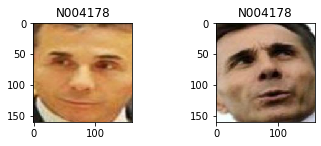

In [35]:
import matplotlib.pyplot as plt


img_paths = all_train_image_pair_paths[0]
label_indexs = all_train_image_pair_labels[0]
image1, image2 = preprocess_image(img_paths[0]), preprocess_image(img_paths[1])
plt.subplot(2,2,1)
plt.imshow(image1)
plt.title(label_names[label_index].title())


plt.subplot(2,2,2)
plt.imshow(image2)

plt.grid(False)
plt.title(label_names[label_index].title())
print()

In [36]:
label_indexs

(587, 587)

In [105]:
input_shape = m.input_shape[1:]

In [106]:
input_shape

(160, 160, 3)

In [107]:
for layer in m.layers[:-6]:
    layer.trainable = False

In [108]:
def squared_differences(pair_of_tensors):
    x, y = pair_of_tensors
    return k.square(x - y)

In [109]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Lambda, add, Dropout, BatchNormalization

inputs1 = Input(input_shape)
inputs2 = Input(input_shape)
x1 = m(inputs1)
x2 = m(inputs2)
x1 = Model(inputs = inputs1, outputs = x1)
x2 = Model(inputs = inputs2, outputs = x2)


x = Lambda(squared_differences)([x1.output, x2.output])
# X = Dense(16, activation = tf.nn.relu)(x)
# X = Dropout(rate=0.5)(X)
X = Dense(8, activation = tf.nn.relu)(x)
X = BatchNormalization()(X)
X = Dropout(0.5)(X)
output = Dense(1, activation = 'sigmoid')(x)

In [110]:
model = Model(inputs =[x1.input,x2.input], outputs=output)
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001), 
    loss = 'binary_crossentropy', 
    metrics = ["accuracy"],
)


In [111]:
all_train_image_pair_paths_a, all_train_image_pair_paths_b = list(zip(*all_train_image_pair_paths))
all_train_image_pair_paths_a = list(all_train_image_pair_paths_a)
all_train_image_pair_paths_b = list(all_train_image_pair_paths_b)

In [112]:
path_ds_a = tf.data.Dataset.from_tensor_slices(all_train_image_pair_paths_a)
path_ds_b = tf.data.Dataset.from_tensor_slices(all_train_image_pair_paths_b)

type(path_ds_a)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [113]:
train_image_datasource_a = path_ds_a.map(preprocess_image, num_parallel_calls=AUTOTUNE)
train_image_datasource_b = path_ds_b.map(preprocess_image, num_parallel_calls=AUTOTUNE)
train_image_datasource = tf.data.Dataset.zip((train_image_datasource_a, train_image_datasource_b))

In [114]:
train_label_datasource = tf.data.Dataset.from_tensor_slices(tf.cast(all_train_data_labels, tf.int64))

In [115]:
train_datasource = tf.data.Dataset.zip((train_image_datasource, train_label_datasource))

In [116]:
all_test_image_pair_paths_a, all_test_image_pair_paths_b = list(zip(*all_test_image_pair_paths))
all_test_image_pair_paths_a = list(all_test_image_pair_paths_a)
all_test_image_pair_paths_b = list(all_test_image_pair_paths_b)

In [117]:
test_path_ds_a = tf.data.Dataset.from_tensor_slices(all_test_image_pair_paths_a)
test_path_ds_b = tf.data.Dataset.from_tensor_slices(all_test_image_pair_paths_b)

type(test_path_ds_a)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [118]:
test_image_datasource_a = test_path_ds_a.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_image_datasource_b = test_path_ds_b.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_image_datasource = tf.data.Dataset.zip((test_image_datasource_a, test_image_datasource_b))

In [119]:
test_label_datasource = tf.data.Dataset.from_tensor_slices(tf.cast(all_train_data_labels, tf.int64))

In [120]:
test_datasource = tf.data.Dataset.zip((test_image_datasource, test_label_datasource))

In [121]:
# train_datasource = train_datasource.shuffle(buffer_size=1000)

In [122]:
train_datasource = train_datasource.repeat()

In [123]:
train_datasource = train_datasource.batch(BATCH_SIZE)

In [124]:
train_datasource = train_datasource.prefetch(buffer_size=AUTOTUNE)

In [125]:
# test_datasource = test_datasource.shuffle(buffer_size=1000)

In [126]:
test_datasource = test_datasource.repeat()

In [127]:
test_datasource = test_datasource.batch(BATCH_SIZE)

In [128]:
test_datasource = test_datasource.prefetch(buffer_size=AUTOTUNE)

In [ ]:

callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
model.fit(train_datasource, epochs=100, callbacks=callbacks, steps_per_epoch=int(len(all_train_image_pair_paths)/BATCH_SIZE),
          validation_data=test_datasource, validation_steps=int(len(all_test_image_pair_paths)/BATCH_SIZE))

Epoch 1/100
1496/1496 [==============================] - 8482s 6s/step - loss: 0.8657 - acc: 0.5471 - val_loss: 0.6966 - val_acc: 0.4986
Epoch 2/100
1496/1496 [==============================] - 8767s 6s/step - loss: 0.6827 - acc: 0.5655 - val_loss: 0.6973 - val_acc: 0.5047
Epoch 3/100
1496/1496 [==============================] - 11738s 8s/step - loss: 0.6797 - acc: 0.5729 - val_loss: 0.6975 - val_acc: 0.4993
Epoch 4/100
213/239 [=========================>....] - ETA: 3:25 - loss: 0.7079 - acc: 0.5000